In [28]:
import os, sys, tarfile

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.io import imread



In [2]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-11-29 08:54:41--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.207, 64.233.191.207, 209.85.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   134MB/s    in 1.6s    

2023-11-29 08:54:43 (134 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [3]:
def extractzipfolder():
  tar = tarfile.open("/content/flower_photos.tgz")
  tar.extractall()
  tar.close()

In [4]:
def unique_filename(file):
    duplicate_nr = 0
    base, extension = os.path.splitext(file)
    while os.path.exists(file):
        duplicate_nr += 1
        file = f'{base}({duplicate_nr}){extension}'
    return file

In [5]:
existsFile = []
flowers_list = []
def move_file(source, destination):
  files = os.listdir(source)
  for file in files:
    isMove=False
    fileName = file
    if(file.endswith(".jpg")):
      basefolder = os.path.basename(os.path.normpath(source))
      if(os.path.exists(os.path.join(destination,file))):
        actualsource_file_path = os.path.join(source, file)
        dir_file_path = unique_filename(actualsource_file_path)
        fileName = dir_file_path
        os.rename(os.path.join(destination,file), dir_file_path)
        shutil.move(dir_file_path, destination)
        os.unlink(actualsource_file_path)
        isMove = True
      else:
          shutil.move(os.path.join(source,file), destination)
          isMove= True
    else:
      if(file.endswith(".txt") == False):
        move_file(os.path.join(rootsource,file), destination)
      #file_name = os.path.join(source, file)
    if(isMove):
      flowers_list.append(
        {
            'Category': basefolder,
            'file_name': fileName
        }
      )
  return flowers_list

In [6]:
def delete_empty_folder(folder_path):
  for entry in os.scandir(folder_path):
    if os.path.isdir(entry.path) and not os.listdir(entry.path):
      shutil.rmtree(entry.path)

In [7]:
import shutil
import os

extractzipfolder()
# Define the source and destination path
rootsource = "/content/flower_photos"
destination = "/content/flower_photos"
list_flower = move_file(rootsource,destination)
delete_empty_folder("/content/flower_photos");

df_flower = pd.DataFrame(list_flower)
df_flower.to_csv("Flowers_list.csv")

In [14]:
path = r"/content/flower_photos"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [9]:
# view the first 5 flower entries
print(flowers[:5])

['10993710036_2033222c91.jpg', '18400014056_2e4c601ed5.jpg', '4278442064_a5a598524b_m.jpg', '8071646795_2fdc89ab7a_n.jpg', '14402451388_56545a374a_n.jpg']


In [101]:
def load_images(path):
    flower_pixel = imread("/content/flower_photos/"+path)
    return flower_pixel

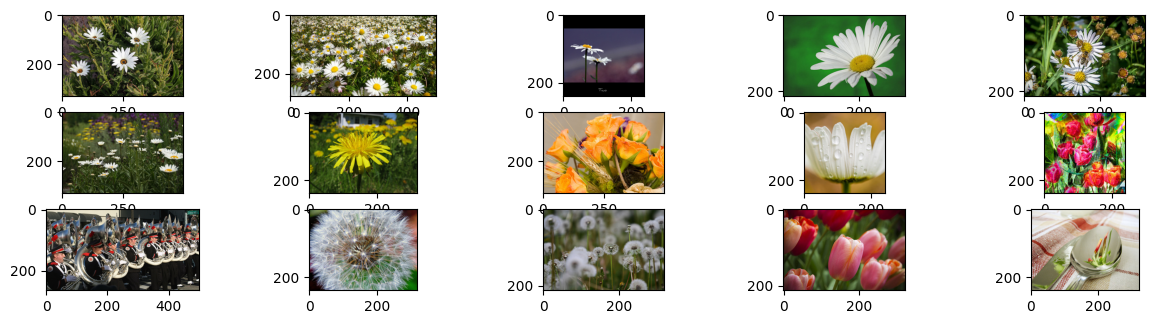

In [108]:
plt.figure(figsize = (15, 25))
actual_image_shapes = []
for i in range(len(flowers[:15])):
  pixels = load_images(flowers[i].name)
  reshaped_pixels = pixels.reshape(pixels.shape[0] * pixels.shape[1], pixels.shape[2])
  plt.subplot(20, 5, i + 1)
  plt.imshow(pixels);
  actual_image_shapes.append({"name" : flowers[i].name, "shape" : pixels.shape, "reshape:" : reshaped_pixels.shape})
plt.show()
df_image_shapes = pd.DataFrame(actual_image_shapes)

In [109]:
df_image_shapes

,name,shape,reshape:
0,10993710036_2033222c91.jpg,"(333, 500, 3)","(166500, 3)"
1,18400014056_2e4c601ed5.jpg,"(277, 500, 3)","(138500, 3)"
2,4278442064_a5a598524b_m.jpg,"(240, 240, 3)","(57600, 3)"
3,8071646795_2fdc89ab7a_n.jpg,"(213, 320, 3)","(68160, 3)"
4,14402451388_56545a374a_n.jpg,"(213, 320, 3)","(68160, 3)"
5,2627815904_919373e7f5.jpg,"(333, 500, 3)","(166500, 3)"
6,3580443099_9a6902ebd8_n.jpg,"(240, 320, 3)","(76800, 3)"
7,515121050_dcb99890be.jpg,"(333, 500, 3)","(166500, 3)"
8,19280272025_57de24e940_m.jpg,"(240, 240, 3)","(57600, 3)"
9,8687675254_c93f50d8b0_m.jpg,"(240, 240, 3)","(57600, 3)"


In [ ]:
pixels = img_np.reshape(img_np.shape[0] * img_np.shape[1],img_np.shape[2])
pixels.shape